In [227]:
import numpy as np
import matplotlib.pyplot as plt

Let's start tackling the problem of many types of particles, and modifiying the functions from the 1 type.

To define diagram with n types of particle, we will still use the same points array as the 1 type case, but now there will be n arrays for the paths, so as a example in the case of quarks, antiquarks and gluons a simple diagram could be.

In [228]:
points =  np.array([[0, -1], [0, 1], [1, 0], [2, 0]])
paths_q = np.array([[1, 3]])
paths_a = np.array([[2, 3]])
paths_g = np.array([[3, 4]])

But this way of separating the paths is inconvenient for the function that we define, so instead let's add them in a single array

In [229]:
def combine_paths(*paths):
    max_len = max([len(path) for path in paths])
    final_path = np.zeros((len(paths), max_len, 2), dtype=int)
    for i in range(len(paths)):
        if len(paths[i]) < max_len:
            final_path[i] = np.append(paths[i], np.zeros((max_len - len(paths[i]), 2), dtype=int), axis=0)
        else:
            final_path[i] = paths[i]
    return final_path
        
paths = combine_paths(paths_q, paths_a, paths_g)

In [230]:
def find_equal_subarrays(array):
    sorted_subarrays = [np.sort(subarray) for subarray in array]
    unique_subarrays, indices, counts = np.unique(sorted_subarrays, axis=0, return_index=True, return_counts=True)
    duplicate_positions = [np.where((sorted_subarrays == unique_subarrays[i]).all(axis=1))[0] for i in range(len(unique_subarrays)) if counts[i] > 1]
    return duplicate_positions

def represent_diagram (points, all_paths, index = False, directory = "", colors = ["tab:blue", "tab:red", "black"], line = ["solid", "solid", "dashed"]):
    fig=plt.figure(figsize=(5,3)) 
    ax=fig.add_subplot(111)
    ax.axis('off')
    j = 0
    for paths in all_paths:
        loops = find_equal_subarrays(paths)
        for i in range(len(paths)):
            if np.isin(i, loops):
                middle_point = (points[paths[i, 0]-1] + points[paths[i, 1]-1]) / 2
                circle = plt.Circle((middle_point[0], middle_point[1]), np.linalg.norm(points[paths[i, 0]-1]-middle_point), color=colors[j], fill=False, linestyle=line[j])
                ax.add_patch(circle)
            else:
                ax.plot([points[paths[i, 0]-1, 0], points[paths[i, 1]-1, 0]], [points[paths[i, 0]-1, 1], points[paths[i, 1]-1, 1]], color=colors[j], linestyle=line[j])
        j+=1
    if index:
        for i in range(len(points)):
            ax.text(points[i, 0], points[i, 1], str(i+1), fontsize=12, color="black", ha="right", va="top")
    if directory != "":
        plt.savefig(directory, bbox_inches='tight')
        plt.close()

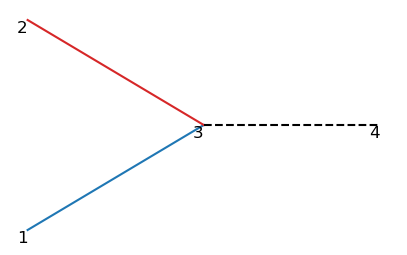

In [231]:
represent_diagram(points, paths, index=True)